In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('loan_data_train.csv')
test_df = pd.read_csv('loan_data_test.csv')

In [3]:
train_df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [4]:
test_df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [5]:
train_df.shape, test_df.shape

((2200, 15), (300, 14))

In [6]:
# # Concat both data frames so that same preprocessing can be done
# train_target = train_df['Interest.Rate']
# train_df.drop('Interest.Rate',inplace= True, axis = 1)

In [7]:
# train_df.shape, test_df.shape

In [8]:
test_df['Interest.Rate'] = 'unknown'

In [9]:
# Creating new column type to identify the train and test set
train_df['type'] = 'train'
test_df['type'] = 'test'

In [10]:
# Cobining bor the data set
df_all = pd.concat([train_df,test_df],axis = 0)
df_all.shape

(2500, 16)

In [11]:
df_all.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
type                               object
dtype: object

In [12]:
# Check for null values

df_all.isna().sum().sort_values(ascending=False)

Employment.Length                 78
Open.CREDIT.Lines                  4
Inquiries.in.the.Last.6.Months     3
Revolving.CREDIT.Balance           3
Monthly.Income                     3
Home.Ownership                     1
State                              1
Debt.To.Income.Ratio               1
Loan.Purpose                       1
Loan.Length                        1
Amount.Funded.By.Investors         1
Amount.Requested                   1
ID                                 1
type                               0
FICO.Range                         0
Interest.Rate                      0
dtype: int64

In [13]:
df_all['State'].unique()

array(['VA', 'NY', 'LA', 'NV', 'OH', 'CA', 'IL', 'NC', 'NJ', 'WA', 'CT',
       'AK', 'CO', 'MA', 'TX', 'VT', 'OK', 'FL', 'NH', 'GA', 'MN', 'MD',
       'WY', 'PA', 'AL', 'AZ', 'SC', 'MI', 'OR', 'RI', 'NM', 'MO', 'WI',
       'KY', 'UT', 'AR', 'WV', 'DE', 'MT', 'KS', 'DC', 'SD', 'HI', 'IN',
       'MS', nan, '.', 'IA'], dtype=object)

#### Insights
- We can drop ID column
- Below columns are supposed to be numeric type. Need to investigate why they are object type and then convert to numeric.
    - Amount.Requested
    - Amount.Funded.By.Investors
    - Loan.Length 
    - Debt.To.Income.Ratio
    - Open.CREDIT.Lines
    - Revolving.CREDIT.Balance
    - Employment.Length  

In [14]:
df_all.drop('ID', inplace = True, axis = 1)

In [15]:
df_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,type
0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [16]:
df_all['Amount.Requested'].unique()   # Seems there are combination of str and numeric values

array(['25000', '19750', '2100', '28000', '24250', '5400', '16000',
       '6400', '24000', '8000', '9000', '13000', '10000', '3600', '7350',
       '17000', '18825', '4200', '5000', '3700', '6625', '15000', '29175',
       '6000', '22000', '18000', '12000', '6500', '4000', '7300', '19400',
       '11625', '3000', '19000', '2500', '17350', '21000', '20000',
       '1900', '23300', '8400', '1600', '7200', '15400', '7000', '20500',
       '24375', '5875', '14000', '5500', '4800', '34500', '20950', '7500',
       '14400', '14675', '24500', '35000', '11200', '30000', '3200',
       '11700', '11500', '8500', '16500', '16550', '13250', '5200',
       '2000', '4500', '20800', '8325', '6600', '7750', '19500', '27050',
       '8800', '11000', '3500', '21200', '2650', '8575', '13200', '10750',
       '5450', '2400', '15300', '17325', '19125', '19075', '5600',
       '10400', '16450', '11325', '10050', '14725', '16750', '4325',
       '10075', '10800', '23500', '6200', '2875', '27825', '12250',
 

In [17]:
df_all['Amount.Requested'] = pd.to_numeric(df_all['Amount.Requested'],errors = 'coerce')

In [18]:
df_all['Amount.Requested'].dtypes

dtype('float64')

In [19]:
df_all['Amount.Funded.By.Investors'].unique()   # Seems there are combination of str and numeric values

array(['25000', '19750', '2100', '28000', '17431.82', '5375', '16000',
       '6400', '23772.15', '8000', '9000', '12975', '10000', '3600',
       '7350', '16975', '18825', '4200', '1750.04', '6625', '15000',
       '29175', '6000', '22000', '18000', '11875', '24000', '5000',
       '5329.76', '3925', '15825', '7300', '20850', '19400', '11625',
       '3000', '19000', '2500', '12000', '7019.25', '14860.05', '21000',
       '0', '18126.99', '1900', '23275', '6725', '1600', '7200',
       '9458.33', '5950', '6975', '4975', '11341.5', '20500', '24375',
       '7000', '20000', '17975', '5875', '12800', '2925', '2275.77',
       '5500', '4775', '34450', '4800', '15875', '10765.99', '6875',
       '20950', '13000', '7500', '.', '14400', '14675', '24450', '24975',
       '35000', '11200', '30000', '766.09', '11650', '11500', '23477.53',
       '8475', '16175', '16550', '9850', '13250', '5200', '11675', '5750',
       '19975', '2000', '4500', '20800', '8500', '23475', '1975', '14375',
       '

In [20]:
df_all['Amount.Funded.By.Investors'] = pd.to_numeric(df_all['Amount.Funded.By.Investors'],errors = 'coerce')

In [21]:
df_all['Amount.Funded.By.Investors'].dtypes

dtype('float64')

In [22]:
df_all['Loan.Length'].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

In [23]:
# There is '.' character in one row we will check by convert that to 36 month

df_all.loc[df_all['Loan.Length'] == '.',['Loan.Length']] = '36'

In [24]:
df_all['Loan.Length'].value_counts()

36 months    1950
60 months     548
36              1
Name: Loan.Length, dtype: int64

In [25]:
df_all['Loan.Length'] = df_all['Loan.Length'].str.replace('months','')

In [26]:
df_all['Loan.Length'].value_counts()

36     1950
60      548
36        1
Name: Loan.Length, dtype: int64

In [27]:
df_all['Loan.Length'] = pd.to_numeric(df_all['Loan.Length'],errors = 'coerce')

In [28]:
df_all['Loan.Length'].dtypes

dtype('float64')

In [29]:
df_all['Debt.To.Income.Ratio'] = df_all['Debt.To.Income.Ratio'].str.replace('%','')

In [30]:
df_all['Debt.To.Income.Ratio'] = pd.to_numeric(df_all['Debt.To.Income.Ratio'],errors = 'coerce')

In [31]:
df_all['Debt.To.Income.Ratio'].dtypes

dtype('float64')

In [32]:
df_all['Open.CREDIT.Lines'].value_counts()  ## Because of '.' character this is converted to object type

8     259
9     236
6     232
7     216
11    187
10    185
13    157
12    153
5     153
14    138
4     105
15     96
16     66
3      59
17     58
18     51
19     30
21     26
2      24
20     23
23     11
22      8
24      7
.       5
25      4
26      3
38      1
31      1
34      1
36      1
Name: Open.CREDIT.Lines, dtype: int64

In [33]:
df_all.loc[df_all['Open.CREDIT.Lines'] == '.'] 

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,type
98,34500.0,34450.0,6.62%,36.0,small_business,16.46,CA,MORTGAGE,10000.00,805-809,.,5317,0.0,9 years,train
1383,9050.0,9050.0,13.11%,36.0,credit_card,20.58,MI,MORTGAGE,5166.67,700-704,.,7571,1.0,7 years,train
1907,3000.0,2975.0,7.90%,36.0,major_purchase,17.58,LA,RENT,3458.33,720-724,.,2999,0.0,1 year,train
5,6000.0,NaN,unknown,36.0,home_improvement,2.52,NJ,MORTGAGE,4800.00,750-754,.,1442,0.0,10+ years,test
135,8000.0,8000.0,unknown,36.0,debt_consolidation,15.46,CA,MORTGAGE,2916.67,675-679,.,7152,1.0,5 years,test


In [34]:
df_all.drop(df_all.loc[df_all['Open.CREDIT.Lines'] == '.'].index, axis = 0, inplace=True)

In [35]:
df_all['Open.CREDIT.Lines'] = pd.to_numeric(df_all['Open.CREDIT.Lines'], errors='coerce')

In [36]:
df_all['Open.CREDIT.Lines'].dtypes

dtype('float64')

In [37]:
df_all['Revolving.CREDIT.Balance'] = pd.to_numeric(df_all['Revolving.CREDIT.Balance'], errors='coerce')

In [38]:
df_all['Revolving.CREDIT.Balance'].dtypes

dtype('float64')

In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2487 non-null   float64
 1   Amount.Funded.By.Investors      2488 non-null   float64
 2   Interest.Rate                   2492 non-null   object 
 3   Loan.Length                     2491 non-null   float64
 4   Loan.Purpose                    2491 non-null   object 
 5   Debt.To.Income.Ratio            2491 non-null   float64
 6   State                           2491 non-null   object 
 7   Home.Ownership                  2491 non-null   object 
 8   Monthly.Income                  2489 non-null   float64
 9   FICO.Range                      2492 non-null   object 
 10  Open.CREDIT.Lines               2488 non-null   float64
 11  Revolving.CREDIT.Balance        2487 non-null   float64
 12  Inquiries.in.the.Last.6.Months  248

In [40]:
df_all['Employment.Length'].value_counts()

10+ years    650
< 1 year     249
2 years      243
3 years      235
5 years      201
4 years      191
1 year       176
6 years      163
7 years      126
8 years      108
9 years       71
.              2
Name: Employment.Length, dtype: int64

In [41]:
df_all['Employment.Length'] = df_all['Employment.Length'].str.replace('years','')
df_all['Employment.Length'] = df_all['Employment.Length'].str.replace('year','')

In [42]:
df_all['Employment.Length'].value_counts()

10+     650
< 1     249
2       243
3       235
5       201
4       191
1       176
6       163
7       126
8       108
9        71
.         2
Name: Employment.Length, dtype: int64

In [43]:
df_all.loc[df_all['Employment.Length'] == '.',['Employment.Length']] = 10
df_all['Employment.Length'] = df_all['Employment.Length'].str.replace('+','')
df_all['Employment.Length'] = df_all['Employment.Length'].str.replace('<','')

In [44]:
df_all['Employment.Length'].value_counts()

10     650
 1     249
2      243
3      235
5      201
4      191
1      176
6      163
7      126
8      108
9       71
Name: Employment.Length, dtype: int64

In [45]:
df_all['Employment.Length'] = pd.to_numeric(df_all['Employment.Length'], errors='coerce')

In [46]:
df_all['Employment.Length'].dtypes

dtype('float64')

In [47]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2487 non-null   float64
 1   Amount.Funded.By.Investors      2488 non-null   float64
 2   Interest.Rate                   2492 non-null   object 
 3   Loan.Length                     2491 non-null   float64
 4   Loan.Purpose                    2491 non-null   object 
 5   Debt.To.Income.Ratio            2491 non-null   float64
 6   State                           2491 non-null   object 
 7   Home.Ownership                  2491 non-null   object 
 8   Monthly.Income                  2489 non-null   float64
 9   FICO.Range                      2492 non-null   object 
 10  Open.CREDIT.Lines               2488 non-null   float64
 11  Revolving.CREDIT.Balance        2487 non-null   float64
 12  Inquiries.in.the.Last.6.Months  248

- Now we can move to categorical columns
    - Loan.Purpose 
    - State
    - Home.Ownership

In [48]:
df_all['Loan.Purpose'].value_counts()

debt_consolidation    1304
credit_card            443
other                  200
home_improvement       151
major_purchase         100
small_business          85
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [49]:
# We will check if there is any relation between state and Interest.Rate feature
# In case of no relationship we will drop the column
df_all['State'].value_counts()

# Lets drop States

df_all.drop('State', inplace = True, axis = 1)

In [50]:
df_all['Home.Ownership'].value_counts()

RENT        1144
MORTGAGE    1141
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [51]:
new_columns = pd.get_dummies(df_all.loc[:,['Home.Ownership','Loan.Purpose']])

In [52]:
df_all = pd.concat([df_all,new_columns],axis = 1)

In [53]:
df_all.drop(['Home.Ownership','Loan.Purpose'],axis = 1, inplace=True)

In [54]:
# Lets try to handel FICO

k = df_all['FICO.Range'].str.split("-",expand=True).astype(float)

df_all['mean_fico'] = 0.5*(k[0]+k[1])

df_all.drop('FICO.Range',axis=1,inplace=True)

In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2487 non-null   float64
 1   Amount.Funded.By.Investors       2488 non-null   float64
 2   Interest.Rate                    2492 non-null   object 
 3   Loan.Length                      2491 non-null   float64
 4   Debt.To.Income.Ratio             2491 non-null   float64
 5   Monthly.Income                   2489 non-null   float64
 6   Open.CREDIT.Lines                2488 non-null   float64
 7   Revolving.CREDIT.Balance         2487 non-null   float64
 8   Inquiries.in.the.Last.6.Months   2489 non-null   float64
 9   Employment.Length                2413 non-null   float64
 10  type                             2492 non-null   object 
 11  Home.Ownership_MORTGAGE          2492 non-null   uint8  
 12  Home.Ownership_NONE  

In [56]:
# Chcking for null values

df_all.isna().sum()

Amount.Requested                    5
Amount.Funded.By.Investors          4
Interest.Rate                       0
Loan.Length                         1
Debt.To.Income.Ratio                1
Monthly.Income                      3
Open.CREDIT.Lines                   4
Revolving.CREDIT.Balance            5
Inquiries.in.the.Last.6.Months      3
Employment.Length                  79
type                                0
Home.Ownership_MORTGAGE             0
Home.Ownership_NONE                 0
Home.Ownership_OTHER                0
Home.Ownership_OWN                  0
Home.Ownership_RENT                 0
Loan.Purpose_car                    0
Loan.Purpose_credit_card            0
Loan.Purpose_debt_consolidation     0
Loan.Purpose_educational            0
Loan.Purpose_home_improvement       0
Loan.Purpose_house                  0
Loan.Purpose_major_purchase         0
Loan.Purpose_medical                0
Loan.Purpose_moving                 0
Loan.Purpose_other                  0
Loan.Purpose

In [57]:
df_all['Employment.Length'].describe() ## Will try to replace null employee length with mean value

count    2413.000000
mean        5.490261
std         3.441228
min         1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: Employment.Length, dtype: float64

In [58]:
df_all.loc[df_all['Employment.Length'].isna(),'Employment.Length'] = df_all['Employment.Length'].mean()

In [59]:
df_all.isna().sum()

Amount.Requested                   5
Amount.Funded.By.Investors         4
Interest.Rate                      0
Loan.Length                        1
Debt.To.Income.Ratio               1
Monthly.Income                     3
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Employment.Length                  0
type                               0
Home.Ownership_MORTGAGE            0
Home.Ownership_NONE                0
Home.Ownership_OTHER               0
Home.Ownership_OWN                 0
Home.Ownership_RENT                0
Loan.Purpose_car                   0
Loan.Purpose_credit_card           0
Loan.Purpose_debt_consolidation    0
Loan.Purpose_educational           0
Loan.Purpose_home_improvement      0
Loan.Purpose_house                 0
Loan.Purpose_major_purchase        0
Loan.Purpose_medical               0
Loan.Purpose_moving                0
Loan.Purpose_other                 0
Loan.Purpose_renewable_energy      0
L

In [60]:
df_all.drop(df_all['Amount.Requested'].isna(), axis = 0)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,...,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,mean_fico
2,2100.0,2100.00,14.33%,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,692.0
3,28000.0,28000.00,16.29%,36.0,19.62,7083.33,12.0,38194.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,712.0
4,24250.0,17431.82,12.23%,60.0,23.79,5833.33,6.0,31061.0,2.0,10.0,...,0,0,0,0,0,0,0,0,0,732.0
6,16000.0,16000.00,22.47%,60.0,11.27,4791.67,5.0,8474.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,667.0
7,6400.0,6400.00,7.51%,36.0,9.58,6400.00,11.0,12306.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,737.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,12000.0,11975.00,unknown,60.0,13.91,7083.33,7.0,3923.0,2.0,7.0,...,0,0,0,0,0,0,0,0,0,707.0
296,5000.0,5000.00,unknown,36.0,17.22,4000.00,10.0,6023.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,707.0
297,4375.0,4375.00,unknown,36.0,9.09,2916.67,9.0,6944.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,672.0
298,13600.0,13600.00,unknown,60.0,12.85,5651.33,13.0,24383.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,677.0


In [61]:
df_all.drop(df_all[df_all['Amount.Requested'].isna()].index, axis = 0, inplace=True)

In [62]:
df_all.drop(df_all[df_all['Amount.Funded.By.Investors'].isna()].index, axis = 0,inplace=True)

In [63]:
df_all.drop(df_all[df_all['Loan.Length'].isna()].index, axis = 0,inplace=True)

In [64]:
df_all.drop(df_all[df_all['Debt.To.Income.Ratio'].isna()].index, axis = 0,inplace=True)

In [65]:
df_all.drop(df_all[df_all['Monthly.Income'].isna()].index, axis = 0,inplace=True)

In [66]:
df_all.drop(df_all[df_all['Open.CREDIT.Lines'].isna()].index, axis = 0,inplace=True)

In [67]:
df_all.drop(df_all[df_all['Revolving.CREDIT.Balance'].isna()].index, axis = 0,inplace=True)

In [68]:
df_all.drop(df_all[df_all['Inquiries.in.the.Last.6.Months'].isna()].index, axis = 0,inplace=True)

In [69]:
df_all.isna().sum()

Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        0
Debt.To.Income.Ratio               0
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                  0
type                               0
Home.Ownership_MORTGAGE            0
Home.Ownership_NONE                0
Home.Ownership_OTHER               0
Home.Ownership_OWN                 0
Home.Ownership_RENT                0
Loan.Purpose_car                   0
Loan.Purpose_credit_card           0
Loan.Purpose_debt_consolidation    0
Loan.Purpose_educational           0
Loan.Purpose_home_improvement      0
Loan.Purpose_house                 0
Loan.Purpose_major_purchase        0
Loan.Purpose_medical               0
Loan.Purpose_moving                0
Loan.Purpose_other                 0
Loan.Purpose_renewable_energy      0
L

In [70]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2471 non-null   float64
 1   Amount.Funded.By.Investors       2471 non-null   float64
 2   Interest.Rate                    2471 non-null   object 
 3   Loan.Length                      2471 non-null   float64
 4   Debt.To.Income.Ratio             2471 non-null   float64
 5   Monthly.Income                   2471 non-null   float64
 6   Open.CREDIT.Lines                2471 non-null   float64
 7   Revolving.CREDIT.Balance         2471 non-null   float64
 8   Inquiries.in.the.Last.6.Months   2471 non-null   float64
 9   Employment.Length                2471 non-null   float64
 10  type                             2471 non-null   object 
 11  Home.Ownership_MORTGAGE          2471 non-null   uint8  
 12  Home.Ownership_NONE  

In [71]:
final_train_df = df_all[df_all['type'] == 'train'].copy(deep= True)

In [72]:
final_train_df.drop('type',inplace = True, axis = 1)

In [73]:
final_train_df

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,...,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,mean_fico
0,25000.0,25000.00,18.49%,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,...,0,0,0,0,0,0,0,0,0,722.0
1,19750.0,19750.00,17.27%,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,712.0
2,2100.0,2100.00,14.33%,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,692.0
3,28000.0,28000.00,16.29%,36.0,19.62,7083.33,12.0,38194.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,712.0
4,24250.0,17431.82,12.23%,60.0,23.79,5833.33,6.0,31061.0,2.0,10.0,...,0,0,0,0,0,0,0,0,0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28%,60.0,12.10,7083.33,16.0,17969.0,1.0,10.0,...,0,0,0,0,1,0,0,0,0,677.0
2196,4200.0,4200.00,14.33%,60.0,14.16,3850.00,4.0,5718.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,702.0
2197,19800.0,19775.00,15.31%,60.0,15.03,6666.67,10.0,46879.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,677.0
2198,18000.0,18000.00,20.99%,60.0,11.63,9051.83,5.0,32394.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,672.0


In [74]:
final_test_df = df_all[df_all['type'] == 'test'].copy(deep=True)

In [75]:
final_test_df.drop('type',inplace = True, axis = 1)

In [76]:
final_test_df

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,...,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,mean_fico
0,5000.0,5000.0,unknown,60.0,12.59,4416.67,13.0,7686.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,692.0
1,18000.0,18000.0,unknown,60.0,4.93,5258.50,6.0,11596.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,712.0
2,7200.0,7200.0,unknown,60.0,25.16,3750.00,13.0,7283.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,752.0
3,7200.0,7200.0,unknown,36.0,17.27,3416.67,14.0,4838.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,792.0
4,22000.0,22000.0,unknown,60.0,18.28,6083.33,9.0,20181.0,0.0,8.0,...,0,0,0,0,0,0,0,0,0,722.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,12000.0,11975.0,unknown,60.0,13.91,7083.33,7.0,3923.0,2.0,7.0,...,0,0,0,0,0,0,0,0,0,707.0
296,5000.0,5000.0,unknown,36.0,17.22,4000.00,10.0,6023.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,707.0
297,4375.0,4375.0,unknown,36.0,9.09,2916.67,9.0,6944.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,672.0
298,13600.0,13600.0,unknown,60.0,12.85,5651.33,13.0,24383.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,677.0


In [77]:
final_train_df['Interest.Rate'] = final_train_df['Interest.Rate'].str.replace('%','')

In [78]:
final_train_df['Interest.Rate'] = pd.to_numeric(final_train_df['Interest.Rate'])

In [79]:
final_train_df

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,...,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,mean_fico
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,...,0,0,0,0,0,0,0,0,0,722.0
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,712.0
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,692.0
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,12.0,38194.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,712.0
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,6.0,31061.0,2.0,10.0,...,0,0,0,0,0,0,0,0,0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,7083.33,16.0,17969.0,1.0,10.0,...,0,0,0,0,1,0,0,0,0,677.0
2196,4200.0,4200.00,14.33,60.0,14.16,3850.00,4.0,5718.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,702.0
2197,19800.0,19775.00,15.31,60.0,15.03,6666.67,10.0,46879.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,677.0
2198,18000.0,18000.00,20.99,60.0,11.63,9051.83,5.0,32394.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,672.0


In [80]:
# Dropping Interest rate from test data set
final_test_df.drop('Interest.Rate',inplace = True, axis = 1)

In [81]:
from sklearn.model_selection import train_test_split
y = final_train_df['Interest.Rate']
x = final_train_df.copy(deep = True)
x.drop('Interest.Rate',inplace = True, axis = 1)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
cols = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Loan.Length',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'mean_fico']

In [84]:
scaler = MinMaxScaler()
scaler.fit(x[cols])

MinMaxScaler()

In [85]:
x[cols] = scaler.transform(x[cols])

In [86]:
x.describe()

,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Home.Ownership_MORTGAGE,...,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,mean_fico
count,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,...,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,0.339120,0.346043,0.217931,0.441329,0.050296,0.224777,0.056760,0.099923,0.496952,0.462529,...,0.008736,0.037701,0.011954,0.011034,0.076782,0.001379,0.035402,0.008276,0.016092,0.347126
std,0.230562,0.222120,0.412935,0.214723,0.039975,0.124844,0.069317,0.135412,0.378704,0.498709,...,0.093077,0.190516,0.108704,0.104488,0.266306,0.037122,0.184837,0.090615,0.125858,0.184551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151103,0.171429,0.000000,0.279576,0.027687,0.138889,0.020681,0.000000,0.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526
50%,0.264706,0.285714,0.000000,0.436265,0.043182,0.194444,0.040735,0.000000,0.444444,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315789
75%,0.470588,0.467143,0.000000,0.592953,0.061500,0.305556,0.069898,0.111111,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447368
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression()

In [91]:
lr.coef_

array([ 1.92620959e+00,  3.92699473e+00,  3.04618602e+00,  5.36896448e-02,
       -2.61393771e+00, -1.33726333e+00, -6.12265812e-01,  3.10469488e+00,
        2.12802365e-02, -2.94047196e+00,  6.21724894e-15, -1.23402876e+00,
       -2.62084742e+00, -2.73094024e+00,  2.60073724e-02, -4.92907479e-01,
       -3.94410511e-01,  1.76393052e-01, -1.99494085e-01, -3.93367924e-01,
       -1.34027536e-01, -3.66444282e-01,  9.97065559e-01,  3.89671421e-01,
        1.46588391e-01, -1.25084610e-01,  1.02932071e+00, -6.59310074e-01,
       -1.63762159e+01])

In [92]:
lr.intercept_

19.281669532878645

In [93]:
# R2 score on training set
lr.score(x_train,y_train)

0.7707620845150309

In [94]:
# R2 score on testing set
lr.score(x_test,y_test)

0.7491576086063455

In [95]:
# Lets try to apply regularization
# L1 Regularisation

from sklearn.linear_model import Lasso

las = Lasso(alpha=0.001)
las.fit(x_train,y_train)

Lasso(alpha=0.001)

In [96]:
las.coef_

array([ 1.85296344e+00,  3.88589094e+00,  3.06051353e+00,  4.77178544e-02,
       -1.90569426e+00, -1.26832612e+00, -4.88342853e-01,  3.05096040e+00,
        5.90368700e-03, -3.36747132e-01,  0.00000000e+00,  9.03554669e-01,
       -0.00000000e+00, -1.14907980e-01,  9.78603816e-02, -3.29767626e-01,
       -2.41185455e-01,  1.65277616e-01, -4.48239169e-02, -1.18956184e-01,
       -0.00000000e+00, -1.50127622e-01,  1.05689237e+00,  5.14417473e-01,
        0.00000000e+00,  0.00000000e+00,  1.02576997e+00, -4.59889258e-01,
       -1.63444467e+01])

In [97]:
las.intercept_

16.507456953707663

In [98]:
las.score(x_train,y_train)

0.7703943833291047

In [99]:
las.score(x_test,y_test)

0.7494368217282461

In [100]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [101]:
ridge.coef_

array([  1.92645706,   3.92655277,   3.04620302,   0.05384309,
        -2.61256134,  -1.33723531,  -0.61247025,   3.10463545,
         0.02127507,  -2.93090636,   0.        ,  -1.22413227,
        -2.61125167,  -2.72134712,   0.02597643,  -0.4928352 ,
        -0.39437248,   0.17637293,  -0.19950325,  -0.393315  ,
        -0.13404882,  -0.3664283 ,   0.99703457,   0.38968393,
         0.14653079,  -0.12506147,   1.02922593,  -0.65926006,
       -16.37589898])

In [102]:
ridge.intercept_

19.271892874537556

In [103]:
ridge.score(x_train,y_train)

0.7707620811454691

In [104]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [105]:
sgd.score(x_train,y_train)

0.765098762365969

In [106]:
sgd.score(x_test,y_test)

0.7454730333616941

### There is no significant Improvement after applying Regularisation

In [107]:
from sklearn.metrics import mean_absolute_percentage_error

In [108]:
y_pred_lr = lr.predict(x_test)

In [109]:
mean_absolute_percentage_error(y_test,y_pred_lr)

0.13738983008139158

In [110]:
y_pred_las = las.predict(x_test)

In [111]:
mean_absolute_percentage_error(y_test,y_pred_las)

0.1375669233616836

In [112]:
y_pred_ridge = ridge.predict(x_test)

In [113]:
mean_absolute_percentage_error(y_test,y_pred_ridge)

0.1373906571173113

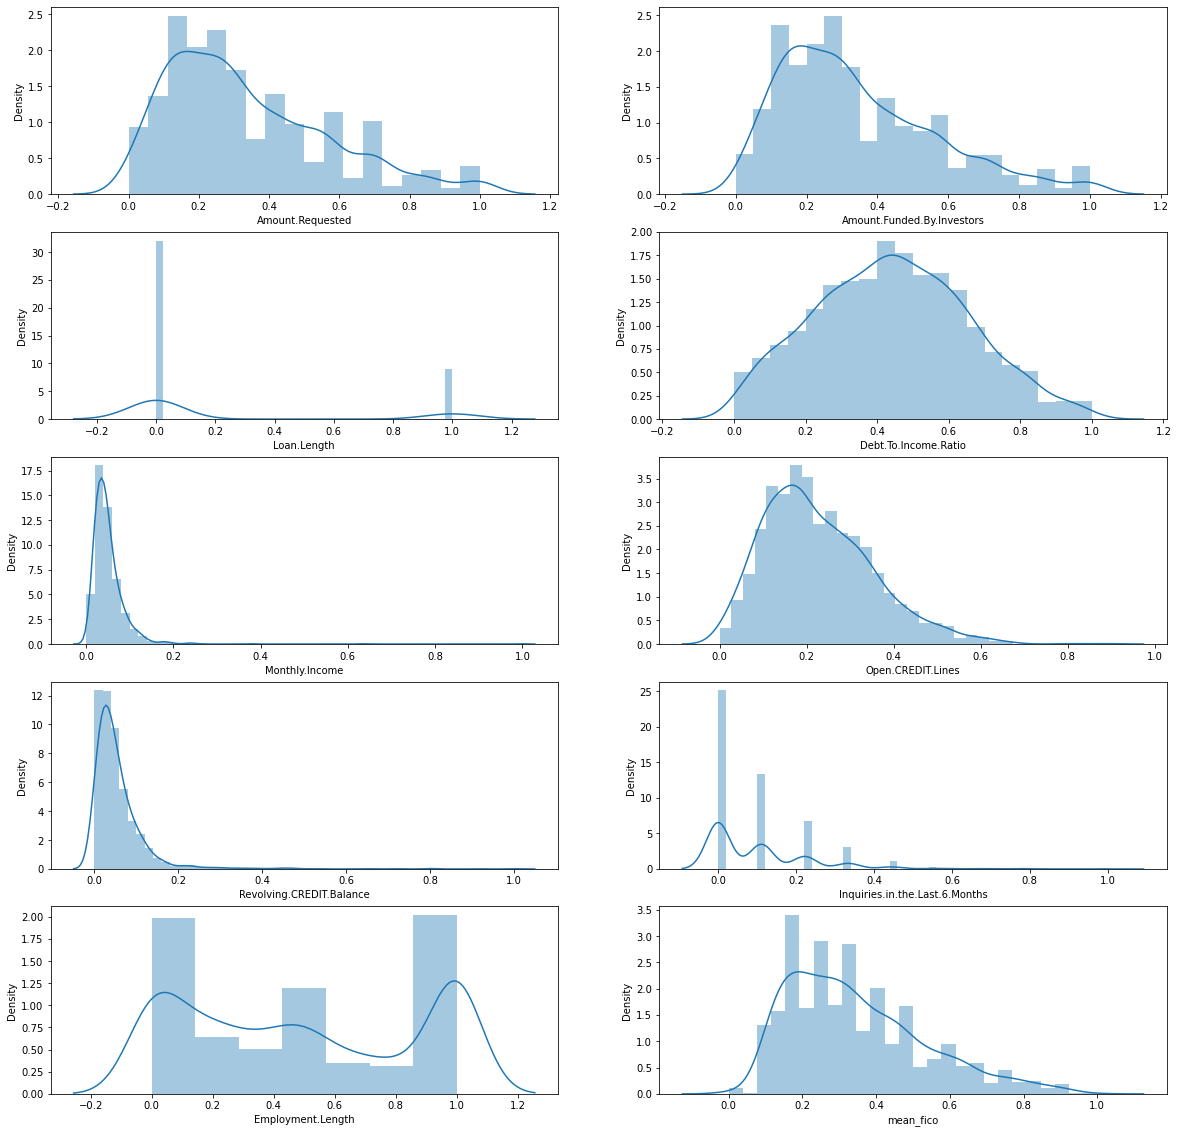

In [114]:
i = 1
plt.figure(figsize = (20,20))
for col in cols:
    plt.subplot(5,2,i)
    sns.distplot(x_train[col])
    i += 1

In [115]:
new_df = x.copy(deep = True)

In [116]:
new_df.head()

,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Home.Ownership_MORTGAGE,...,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,mean_fico
0,0.705882,0.714286,1.0,0.789459,0.078484,0.250000,0.056167,0.333333,0.444444,1,...,0,0,0,0,0,0,0,0,0,0.421053
1,0.551471,0.564286,1.0,0.383558,0.060189,0.333333,0.070421,0.333333,0.333333,1,...,0,0,0,0,0,0,0,0,0,0.368421
2,0.032353,0.060000,0.0,0.100258,0.004028,0.305556,0.003298,0.111111,0.000000,0,...,0,1,0,0,0,0,0,0,0,0.263158
3,0.794118,0.800000,0.0,0.562017,0.063574,0.277778,0.141041,0.111111,1.000000,1,...,0,0,0,0,0,0,0,0,0,0.368421
4,0.683824,0.498052,1.0,0.681467,0.051339,0.111111,0.114701,0.222222,1.000000,1,...,0,0,0,0,0,0,0,0,0,0.473684


In [123]:
y_new = final_train_df['Interest.Rate']
x_new = final_train_df.copy(deep = True)
x_new.drop('Interest.Rate',inplace = True, axis = 1)

In [126]:
x_new['Monthly.Income'].sort_values()   ### All values are +ve

1440       588.50
1968       666.67
1180       833.33
425        866.67
1859       884.90
          ...    
2098     25000.00
712      27083.33
803      39583.33
516      65000.00
1621    102750.00
Name: Monthly.Income, Length: 2175, dtype: float64

In [117]:
from sklearn import preprocessing

In [141]:
pt = preprocessing.PowerTransformer(method = 'yeo-johnson')  # Works with +ve and -ve both
x_new['Monthly.Income'] = pt.fit_transform(x_new[['Monthly.Income']])
x_new['Revolving.CREDIT.Balance'] = pt.fit_transform(x_new[['Revolving.CREDIT.Balance']])
x_new['Employment.Length'] = pt.fit_transform(x_new[['Employment.Length']])

In [135]:
# Works with only +ve values
# pt_box = preprocessing.PowerTransformer(method = 'box-cox')
# test_box = pt_box.fit_transform(x_new[['Monthly.Income']])

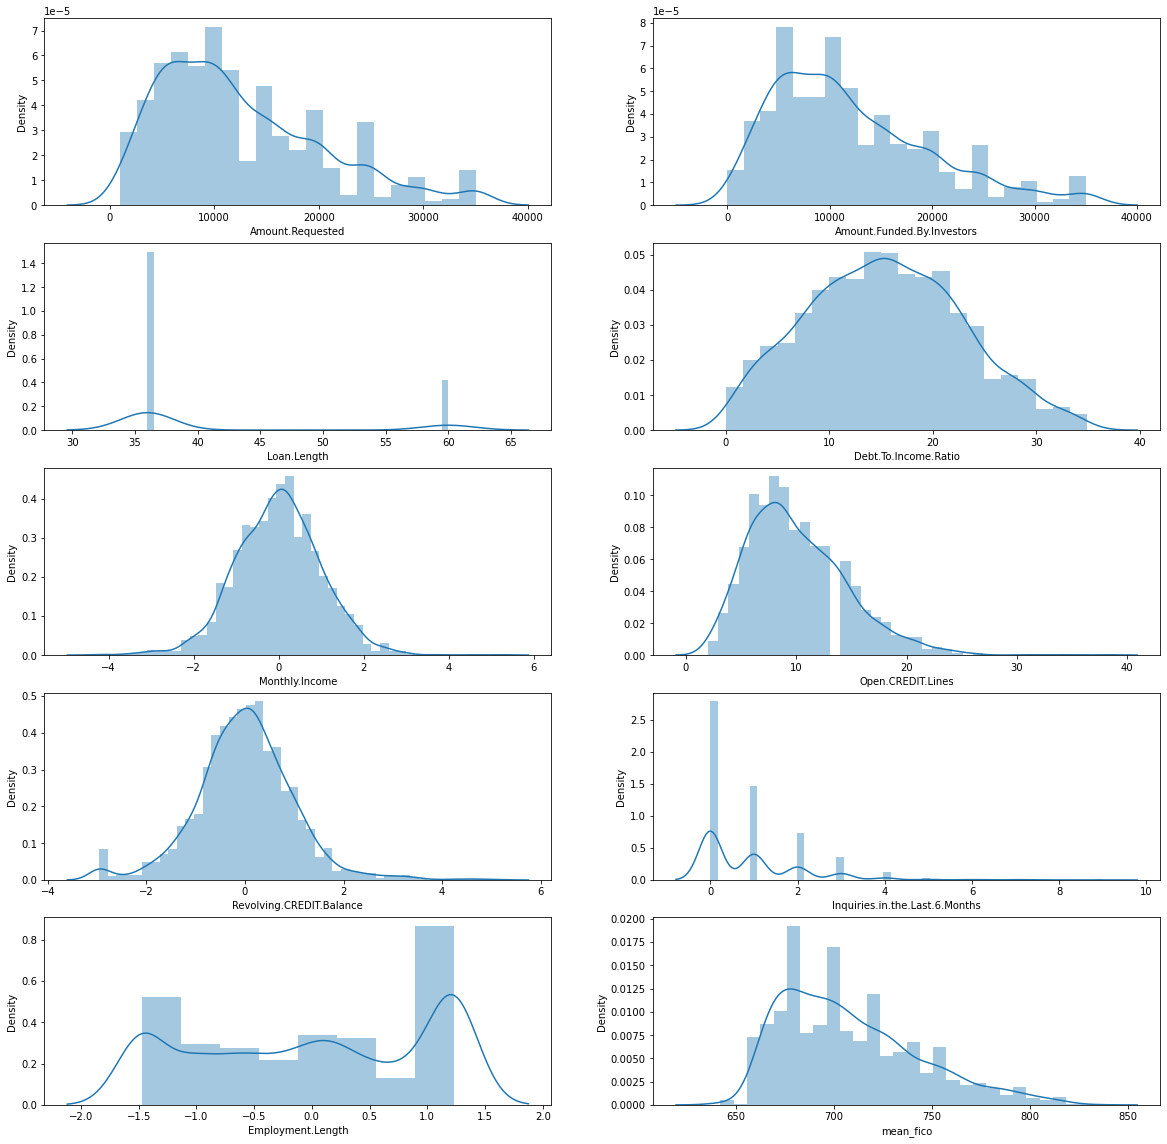

In [142]:
i = 1
plt.figure(figsize = (20,20))
for col in cols:
    plt.subplot(5,2,i)
    sns.distplot(x_new[col])
    i += 1

In [149]:
scaler = MinMaxScaler()
x_new[cols] = scaler.fit_transform(x_new[cols])

In [150]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,test_size = 0.20,random_state=35)

In [151]:
lr.fit(x_train_new,y_train_new)

LinearRegression()

In [152]:
lr.score(x_train_new,y_train_new)

0.7747114584226098